In [5]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import scipy.stats as st
import seaborn as sns

from scipy.stats import norm

## 客观概率和主观概率

https://zhuanlan.zhihu.com/p/331650901?utm_psn=1742504026049118208

1. 客观概率和主观概率

- 主观概率是依赖于观测主体而存在的，如果将观测主体破坏掉，则主观概率也就消失。这一点和客观概率不同。客观概率不依赖于观测主体是否存在，它是客观地存在着。
- 一个概率是不是主观概率？看它是不是依赖一个观测主体。
- 主观概率，就是依赖于某个观测主体而存在的概率，它是条件概率，就是观测主体从无限过去到现在，接收到的全部有关观测客体的有关观测值的条件下的条件概率，这也被称之为后验概率。

2. 在实际应用中很可能是有多个观测主体的，
- 在多个观测主体接收到的信息流不同的时候，它们对于同一观测客体的概率分布，或者说认识，是不同的。

3. 一个观测主体，同时也是一个控制主体。
- 控制是在观测当中无法避免的行为，控制会影响观测

4. 观测过程理论是反对任何估计行为的，我们只要得到有关观测客体的后验分布，这就够了。
- [观点]：根据观测的结果要不要做什么控制，是根据分布来做决策的，而不应当是根据什么估计值来做决策。



## 贝叶斯推断（Bayesian inference）

$ p(\theta|x) = \frac{p(x|\theta)*p(\theta)}{p(x)}$

其中 $\theta $代表一种假设，$ x $代表一种观察结果。

称 $ p(\theta) $ 为先验概率(prior)，是在还没有观测$ x $ 的情况下，$\theta $ 自身的概率。

称 $ p(\theta|x) $ 为后验概率(posterior)，表示在观察到了$ x $ 的情况下，$\theta $ 的条件概率。

称 $ L (x|\theta) = C*p(x|\theta) $ 为似然函数（likelihood），其中C为常数，因为似然函数的绝对数值没有意义。

称 $ p(x) $ 为证据因子(evidence)，有时也会称为边缘似然。

>关于 先验概率 和条件概率:
>
>先验概率：指决策者基于自己的知识、经验，对某事件在未来发生可能性大小的一种估计值。
>
>条件概率是指：已知某特定情况（或事件）发生的前提下，某事件在未来发生可能性的一种估计值，定义式P（A|B）＝P(AB)／P(B)，　要求P(B)＞0．


In [14]:
def factorial(n):
    """Calculate the factorial of a non-negative integer n"""
    return np.prod(np.arange(1, n + 1))

def Probility(num_flips:int , num_heads:int, theta: float, debug: bool= False):
    """基于参数theta和，计算该系列掷发生的概率"""
    # num_heads = np.sum(X)  # 正面朝上的次数
    # num_flips = len(X)     # 抛掷的次数
    p =  theta ** num_heads * (1 - theta) ** (num_flips - num_heads)
    C = factorial(num_flips) / (factorial(num_heads)*factorial(num_flips - num_heads) )
    if debug: print(f"num_heads = {num_heads}, num_flips = {num_flips}; Probility ={P} with given x:{theta}")    
    return P


In [15]:
factorial(10) / (factorial(5)*factorial(5) )

252.0

In [ ]:
Probility(10

### 概率密度函数和似然函数
本质上是一个函数p(x|θ)的两种形式。**似然函数的定义域是θ，而概率函数的定义域是X**。
#### 解释1
p(x|θ) is a function of two variables. If you hold θ constant, you get the probability function (function of x), but if you hold x constant, you get the likelihood function (function of θ).

p(x|θ)是一个有着两个变量的函数。如果，你将θ设为常量，则你会得到一个概率函数（关于x的函数）；如果，你将x设为常量你将得到似然函数（关于θ的函数）。
#### 解释2
已知一定量的样本数据X，在X条件下，参数θ的最大似然估计就是使得该样本数据出现的概率（可能性）最大，那么参数θ的似然函数就是该样本数据出现的概率了，似然和概率只是数值相等，但定义域不同，**似然函数的定义域是θ，而概率函数的定义域是X**。

https://www.quora.com/What-is-the-difference-between-probability-and-likelihood-1


已知硬币的参数，就可以去推测抛硬币的各种情况的可能性，这称为概率。比如已知硬币是公平的，也就是硬币的参数θ=0.5。
那么我们就可以推测，扔10次硬币，出现5次head朝上的概率为 $θ^5(1-θ)^5$= 0.25


In [7]:
X = np.array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1])
Probility(X, 0.5, True)

num_heads = 5, num_flips = 10; Probility =0.0009765625 with given x:0.5


0.0009765625

下面举一个例子：有一个硬币，它有θ的概率会正面向上，有1-θ的概率反面向上。θ是存在的，但是你不知道它是多少。为了获得θ的值，你做了一个实验：将硬币抛10次，得到了一个正反序列：x=HHTTHTHHHH。无论θ的值是多少，这个序列的概率值为 θ⋅θ⋅(1-θ)⋅(1-θ)⋅θ⋅(1-θ)⋅θ⋅θ⋅θ⋅θ = θ⁷ (1-θ)³比如，如果θ值为0，则得到这个序列的概率值为0。如果θ值为1/2，概率值为1/1024。但是，我们应该得到一个更大的概率值，所以我们尝试了所有θ可取的值，画出了下图：

![image.png](attachment:ce6fccfc-1a53-421f-b0a1-8a5d5fe77a3d.png)

这个曲线就是θ的似然函数，通过了解在某一假设下，已知数据发生的可能性，来评价哪一个假设更接近θ的真实值。如图所示，最有可能的假设是在θ=0.7的时候取到。但是，你无须得出最终的结论θ=0.7。事实上，根据贝叶斯法则，0.7是一个不太可能的取值（如果你知道几乎所有的硬币都是均质的，那么这个实验并没有提供足够的证据来说服你，它是均质的）。但是，0.7却是最大似然估计的取值。因为这里仅仅试验了一次，得到的样本太少，所以最终求出的最大似然值偏差较大，如果经过多次试验，扩充样本空间，则最终求得的最大似然估计将接近真实值0.5。

作者：HiTao
链接：https://www.zhihu.com/question/54082000/answer/470252492
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

In [2]:
def coin_flip(n_flips, seed=None):
    """模拟抛硬币, 如果需要可重现，seed提供固定值"""
    if seed is not None:
        np.random.seed(seed)
    return np.random.randint(0, 2, n_flips) #模拟抛硬币 n_flips 次，返回一个由0和1组成的数组，其中0代表正面，1代表反面

def generate_normal_distribution(n_samples, n_flips):
    """生成正态分布，抛n_times次，计算sum值"""
    samples = np.zeros(n_samples)
    for i in range(n_samples):
        flips = coin_flip(n_flips) #模拟抛硬币 n_flips 次，返回一个由0和1组成的数组，其中0代表正面，1代表反面
        samples[i] = flips.sum()   #第i次实验，共有多少次1，计算总量；得到0的次数就是n_times-flips.sum()
    return samples 


def hist_dist(data, bin_num, y_density):
    """绘制直方图和标准正态分布曲线"""
    # 绘制直方图
    plt.hist(data, bins=bin_num, density=y_density, alpha=0.6, color='g')
    # 绘制标准正态分布曲线作为对比
    mu = data.mean()
    sigma = data.std()
    xmin, xmax = plt.xlim()

    y_label = "Density of Values" if y_density else "Num of Values"
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title("Normal distribution")
    plt.xlabel("Values")
    plt.ylabel(y_label)
    plt.show()


In [ ]:
N_samples = 10000  # 样本数（实验次数，每次实验抛N_flips次）
N_flips = 100
data = generate_normal_distribution(N_samples, N_flips)
mu, sigma= data.mean(), data.std()
mu, sigma

In [ ]:
hist_dist(data, 100, True)

In [ ]:
def likelihood(data, p, debug: bool= False):
    """基于已知的参数p，计算一系列结果发生的概率"""
    num_heads = np.sum(data)  # 正面朝上的次数
    num_flips = len(data)     # 抛掷的次数
    L = p ** num_heads * (1 - p) ** (num_flips - num_heads)
    if debug: print(f"num_heads = {num_heads}, num_flips = {num_flips}; Likelihood ={L} with given p:{p}")    
    return L

def mle_from_data(data, n_bin):
    """Find Maximum Likelihood Estimate (MLE) of p from given data"""
    mle = None
    max_likelihood = -1
    
    for p in np.linspace(0, 1, n_bin):  # Iterate over a range of p values
        L = likelihood(data, p)
        if L > max_likelihood:
            max_likelihood = L
            mle = p
    
    return mle

In [ ]:
test_short_data = np.array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [ ]:
likelihood(test_short_data, 0.5)

In [ ]:
flips = coin_flip(N_flips,seed = 2023)

In [ ]:
MLE = mle_from_data(flips, 100)

In [ ]:
likelihood(flips, MLE, True)

In [ ]:
def likelihood_function(data):
    """以theta为变量，计算对应的likelihood value，画图"""

    theta = np.linspace(0, 1, 100)     # 以0.01为步长
    
    # 计算每个概率值下的似然函数值
    likelihoods = [likelihood(data, p, False) for p in theta]
    
    # 绘制似然函数的图
    plt.plot(theta, likelihoods)
    plt.title("Likelihood Function")
    plt.xlabel("Probability of Heads")
    plt.ylabel("Likelihood")
    plt.show()
    return 
    

In [ ]:

likelihood_function(test_short_data)

likelihood_function(flips)



# 随机变量常见分布

## 离散分布
### 伯努利分布（0-1分布）

### 二项分布 （n重伯努利分布）

### 多项分布 （多结果的二项分布）

## 连续分布
### 正态分布 （二项分布的极限形式）

## 使用波士顿房价的数据来看看正态分布

In [ ]:
train = pd.read_csv(u'dataset/c_13_houseprice.csv')
train.head(3)

In [ ]:
SP = train['SalePrice'].replace([np.inf, -np.inf], np.nan)

In [ ]:
type(SP)

### 绘制直方图+分布图

In [ ]:
hist_dist(SP,100,True)

另一种查看是否服从正态分布的可视化方法，通过概率图来观察，


In [ ]:
plt.figure()
res = st.probplot(train['SalePrice'], plot=plt)

把房价做对数变换后再看

In [ ]:
SP_log = np.log(SP)
res = st.probplot(SalePrice_log, plot=plt)
plt.figure()

In [ ]:
sns.kdeplot(SP_log)

In [ ]:
hist_dist(SP_log)

---

## 中间值和均值
表现＂中间值＂的统计名词：

　　a.均值:   mean，数列的算术平均值，反应了数列的集中趋势,等于有效数值的合除以有效数值的个数．
  
　　b.中位值: median，等于排序后中间位置的值，当数列长度为偶数时，取中间两个值的均值．
  
　　c.众数: 　mode，等于数列出现次数最多的数字，当多个数字都出现最高次数时，多个数字都是众数．

在统计学中，为了区分＂样本（抽样）概念＂和＂总体概念＂，将均值区分为样本均值和总体均值，而它们的实际大小是相同的．

## 总体方差
方差(variance)是衡量随机变量或一组数据时离散程度的度量.实际上是每个样本和均值的差的和的平方的总和。

$ \sigma^2 = \frac{\sum_{i=1}^N{(X_i-\mu)^2}}{N} $

公式解析：

　　1.和样本数无关，分母为样本数 N

　　2.累加每个值和均值差值的平方，对应于每个值相对于均值的偏差，对应于离散程度，平方是对离散程度的加剧，同时能让差值总为正数，以符合偏差的概念意义

　　3.显然，如果所有数值都乘以n倍，总体方差会乘以 $n^2$ 倍



## 样本方差
样本方差是指总体各单位变量值与其算术平均数的离差平方的平均数。
要点：样本方差是总体方差的无偏估计量。（无偏性：估计量抽样分布的数学期望等于被估计的总体参数）问题：为什么计算总体方差分母是“n”而样本方差分母是“n-1”？答：因为样本方差要更好的估计总体方差，则其应该是总体方差的无偏估计量，即 $ E（ s^2 ）= \sigma^2  $。

链接：https://zhuanlan.zhihu.com/p/315504747

样本方差的意义是用来估计总体方差（统计术语：样本方差是对总体方差的无偏估计），样本方差计算公式和总体方差有所不同:

$ s^2 = \frac{\sum_{i=1}^N{(X_i-\mu)^2}}{N-1} $

## 标准差：就是 $\sqrt(方差)  $
通过求平方根，把因为平方而”放大“了的方差，变成和样本同一个量级，就是标准差。那么标准差也有两个版本：
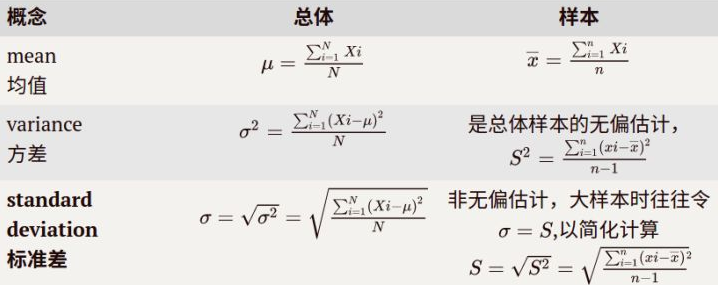


In [ ]:
a1 = np.array([0,0,5,5])
a2 = np.array([2,2,3,3])
print (f"总体方差：")
print (f"a1方差   = {a1.var()} , a2方差  = {a2.var()}") # 6.25 0.25
print (f"a1标准差 = {a1.std()}  , a2标准差 = {a2.std()}") # 2.5 0.5
print (f"样本方差：")
print (f"a1方差   = {a1.var(ddof=1)} , a2方差 = {a2.var(ddof=1)}") #ddof = 1代表样本的方差和标准差
print (f"a1标准差 = {a1.std(ddof=1)} , a2标准差 = {a2.std(ddof=1)}")